In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.options.display.max_columns = 100

In [3]:
path = '../Data/2018_rc_data.xlsx'
xl = pd.ExcelFile(path)
sheet_names = xl.sheet_names
sheet_names

['READ ME_Instructions',
 'ACT',
 'achievement',
 'discipline',
 'chronic_absenteeism',
 'CTE',
 'dropout',
 'ELPA',
 'enrollment',
 'finance',
 'grad_rate',
 'growth',
 'growth_subjects',
 'indicator_level_grades',
 'long_term_ell',
 'overall_grades',
 'postsec_enrollment',
 'ready_grad',
 'staffing',
 'success_rate',
 'teacher_retention',
 'district_info',
 'school_info']

In [4]:
for sheetname in sheet_names:
    if sheetname != 'READ ME_Instructions':
        vars()['df' + sheetname] = pd.read_excel(path, sheet_name= sheetname)


In [5]:
dfenrollment.head()


,district_number,district_name,school_number,school_name,year,subgroup,grades_served,value,value_previous
0,0,State of Tennessee,0,NaN,2018,Homeless,Grades K-12,1.3,NaN
1,0,State of Tennessee,0,NaN,2018,American Indian or Alaskan Native,Grades K-12,0.4,NaN
2,0,State of Tennessee,0,NaN,2018,All Students,Grades K-12,975222.0,NaN
3,0,State of Tennessee,0,NaN,2018,Students with Disabilities,Grades K-12,13.6,NaN
4,0,State of Tennessee,0,NaN,2018,Economically Disadvantaged,Grades K-12,36.1,NaN


In [6]:
enrollment =  dfenrollment [['district_name','school_name', 'subgroup', 'value']]

In [7]:
dfoverall_grades

,district_number,district_name,school_number,school_name,year,subgroup_overall,pool,final_score,all_students_overall,score_achievement,score_growth,score_absenteeism,score_elpa,score_grad,score_ready_grad
0,10,Anderson County Schools,2,Anderson County High School,2018,NaN,HS,NaN,NaN,1.6,3.1,1.4,NaN,3.2,3.0
1,10,Anderson County Schools,5,Andersonville Elementary,2018,NaN,K8,NaN,NaN,2.2,3.6,2.4,NaN,NaN,NaN
2,10,Anderson County Schools,10,Briceville Elementary,2018,NaN,K8,NaN,NaN,3.0,3.8,0.0,NaN,NaN,NaN
3,10,Anderson County Schools,15,Claxton Elementary,2018,NaN,K8,NaN,NaN,3.2,3.6,0.0,NaN,NaN,NaN
4,10,Anderson County Schools,20,Clinton Middle School,2018,NaN,K8,NaN,NaN,2.0,0.1,1.1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,985,Achievement School District,8130,Memphis Scholars Raleigh-Egypt,2018,NaN,K8,NaN,NaN,2.8,3.7,3.2,NaN,NaN,NaN
1745,985,Achievement School District,8135,Kirby Middle School,2018,NaN,K8,NaN,NaN,2.9,3.9,2.2,3.7,NaN,NaN
1746,985,Achievement School District,8140,Hillcrest High School,2018,NaN,HS,NaN,NaN,1.0,0.3,1.3,4.0,NaN,NaN
1747,985,Achievement School District,8145,Rocketship Partners Community Prep,2018,NaN,K8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
school_scores=  dfoverall_grades [['school_name', 'all_students_overall','score_achievement', 'score_growth', 'score_absenteeism', 'score_elpa', 'score_grad']]

In [10]:
rc_1 = enrollment.merge(school_scores, how = 'inner', 
                        on = 'school_name')

In [12]:
post_sec = dfpostsec_enrollment.iloc[: , [3, 5, 6,7, 8, 9]].copy()

In [54]:
dfteacher_retention.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1892 entries, 0 to 1891
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   district_number   1892 non-null   int64 
 1   district_name     1765 non-null   object
 2   school_number     1892 non-null   int64 
 3   school_name       1623 non-null   object
 4   year              1892 non-null   int64 
 5   percent_retained  1890 non-null   object
dtypes: int64(3), object(3)
memory usage: 88.8+ KB


In [56]:
dfteacher_retention['percent_retained'].unique()

array(['90.9', '89.5', '95.1', '78.6', '92.0', '100.0', '81.8', '77.1',
       '80.0', '72.7', '79.2', '89.7', '88.0', '91.4', '85.7', '52.9',
       '83.3', '82.6', '81.6', '85.0', '86.0', '87.1', '89.2', '92.7',
       '87.9', '86.7', '82.1', '88.6', '88.2', '83.7', '95.0', '81.9',
       '62.3', '95.6', '93.8', '84.6', '68.2', '97.0', '84.8', '94.3',
       '85.2', '93.3', '94.1', '93.9', '96.4', '92.3', '88.8', '83.8',
       '73.3', '91.5', '88.9', '95.2', '87.5', '89.8', '82.2', '88.1',
       '96.0', '90.5', '75.0', '79.3', '95.5', '90.3', '92.6', '94.8',
       '97.1', '96.7', '87.8', '86.2', '92.9', '95.8', '91.9', '89.1',
       '94.6', '93.2', '89.9', '83.9', '93.1', '90.0', '88.5', '95.7',
       '93.0', '88.4', '*', '96.6', '91.3', '86.5', '96.3', '93.5',
       '92.5', '77.8', '91.7', '84.0', '89.3', '87.6', '69.2', '96.2',
       '74.4', '76.5', '82.8', '90.6', '97.4', '81.4', '87.7', '87.4',
       '86.1', '72.1', '85.3', '81.1', '76.0', '87.0', '84.2', '80.4',
       '

In [57]:
dfteacher_retention['percent_retained'] = dfteacher_retention['percent_retained'].replace('\*+', np.nan, regex=True)

In [58]:
dfteacher_retention['percent_retained'] = dfteacher_retention['percent_retained'].astype(float)

In [68]:
Top_10_teacher_retention=dfteacher_retention.nlargest(n=10, columns =['percent_retained'])

In [82]:
by_district_teach_ret=dfteacher_retention[dfteacher_retention['school_name'].isnull()&dfteacher_retention['district_name'].notnull()]

In [83]:
Top_10_district_retention=by_district_teach_ret.nlargest(n=10, columns =['percent_retained'])

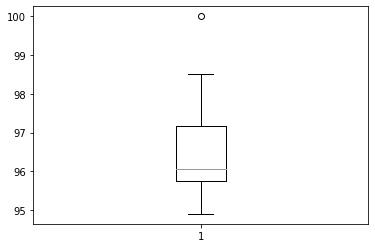

In [88]:
plt.boxplot(Top_10_district_retention['percent_retained']);

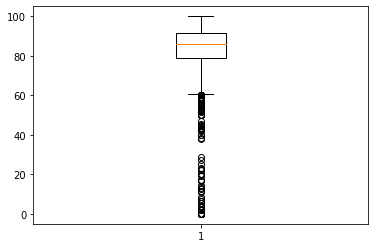

In [91]:
plt.boxplot(dfteacher_retention['percent_retained'].dropna());

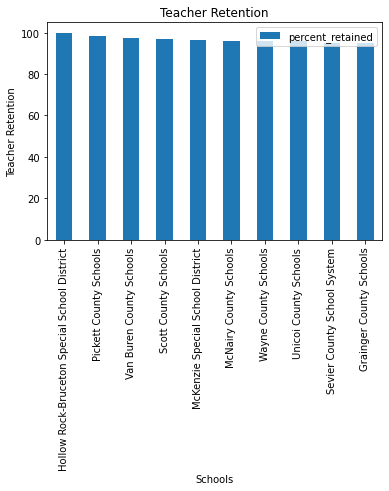

In [85]:
Top_10_district_retention.plot(kind='bar', x='district_name',y='percent_retained')
  
plt.xlabel('Schools')
plt.ylabel('Teacher Retention')
plt.title('Teacher Retention')
plt.show()

In [13]:
teacher_retention =  dfteacher_retention [['school_name', 'percent_retained']]

In [14]:
rc_2 = pd.merge(rc_1, post_sec, on = ['school_name', 'subgroup'])

In [15]:
rc_3 = pd.merge(rc_2, teacher_retention, on = 'school_name')

In [16]:
rc_3 = rc_3.rename(columns = {'value':'enrolled'})

In [17]:
rc_3.columns

Index(['district_name', 'school_name', 'subgroup', 'enrolled',
       'all_students_overall', 'score_achievement', 'score_growth',
       'score_absenteeism', 'score_elpa', 'score_grad', 'percent_4yr_ps',
       'percent_any_ps', 'percent_2yr_ps', 'percent_tcat_ps',
       'percent_retained'],
      dtype='object')

In [18]:
rc_4 = rc_3.melt(id_vars =['district_name', 'school_name', 'subgroup', 'enrolled'], value_vars =['score_achievement', 'score_growth', 'score_absenteeism', 'score_elpa',
       'score_grad', 'percent_4yr_ps', 'percent_any_ps', 'percent_2yr_ps',
       'percent_tcat_ps', 'percent_retained']).dropna()

In [19]:
rc_4['value'].unique()

array([1.6, 2.2, 3.0, 3.2, 2.0, 0.4, 1.2, 1.0, 4.0, 1.8, 3.7, 2.4, 1.4,
       0.6, 2.1, 3.4, 1.9, 1.1, 2.8, 0.2, 0.8, 0.0, 1.3, 0.7, 2.6, 3.6,
       0.9, 2.7, 3.9, 3.3, 3.1, 0.1, 1.7, 2.9, 2.5, 1.5, 0.3, 3.8, 2.3,
       3.5, 0.5, '**', '*', '22.7', '6.2', '12.3', '19.2', '15.8', '43.2',
       '15.6', '21.3', '45.1', '18.8', '8.3', '28', '5.6', '15.2', '10.7',
       '8.6', '5', '7.9', '23.1', '20.6', '40', '14', '32.1', '11.8',
       '17', '24.5', '18.4', '9.4', '5.9', '17.5', '6.1', '26.3', '21.7',
       '41.6', '30', '34.4', '49.7', '10.8', '8', '19.5', '20', '30.9',
       '7.7', '24.4', '16.5', '29.6', '15.4', '17.6', '6.3', '7', '9.8',
       '25.2', '23.3', '21.1', '9.1', '8.7', '26.5', '34', '20.3', '37',
       '28.2', '30.3', '27.7', '22.3', '10.6', '39.4', '46.7', '44.6',
       '33.3', '11.5', '6.7', '32.4', '50', '17.4', '14.3', '27.6',
       '14.5', '22.6', '24', '36.6', '19', '16.7', '27.3', '33.5', '40.5',
       '42.2', '35', '26.7', '26.9', '16', '22', '29', '31

In [20]:
rc_4['value']=rc_4['value'].replace('\*+', np.nan, regex=True)


In [21]:
rc_4['value'] = rc_4['value'].astype(float)

In [45]:
rc_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227000 entries, 0 to 265399
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   district_name  227000 non-null  object 
 1   school_name    227000 non-null  object 
 2   subgroup       227000 non-null  object 
 3   enrolled       227000 non-null  float64
 4   variable       227000 non-null  object 
 5   value          139367 non-null  float64
dtypes: float64(2), object(4)
memory usage: 12.1+ MB


In [22]:
rc_4_all_students= rc_4[rc_4['subgroup']== "All Students"]

In [23]:
pd.DataFrame(rc_4_all_students.groupby(['district_name', 'variable'])['value'].mean())

value
district_name                 variable                    
Achievement School District   percent_2yr_ps           NaN
                              percent_4yr_ps           NaN
                              percent_any_ps           NaN
                              percent_retained   35.600000
                              percent_tcat_ps          NaN
...                                                    ...
Wilson County School District score_absenteeism   2.953846
                              score_achievement   2.242308
                              score_elpa          3.018919
                              score_grad          3.650000
                              score_growth        2.244231

[1335 rows x 1 columns]

In [24]:
rc_4_all_students

,district_name,school_name,subgroup,enrolled,variable,value
2,Anderson County Schools,Anderson County High School,All Students,1056.0,score_achievement,1.6
8,Anderson County Schools,Andersonville Elementary,All Students,310.0,score_achievement,2.2
10,Anderson County Schools,Briceville Elementary,All Students,109.0,score_achievement,3.0
18,Anderson County Schools,Claxton Elementary,All Students,459.0,score_achievement,3.2
21,Anderson County Schools,Clinton Middle School,All Students,666.0,score_achievement,2.0
...,...,...,...,...,...,...
265379,Achievement School District,Frayser Achievement Elementary,All Students,216.0,percent_retained,20.0
265380,Achievement School District,Whitney Achievement Elementary School,All Students,333.0,percent_retained,38.1
265387,Achievement School District,Georgian Hills Achievement Elementary School,All Students,265.0,percent_retained,42.9
265391,Achievement School District,Cornerstone Prep - Lester Campus,All Students,380.0,percent_retained,62.5


In [25]:
#new_df = og_df.groupby(feature)[target].value_counts(normalize=True)
#new_df = new_df.mul(100).rename('Percent').reset_index()

In [42]:
new_df = rc_4_all_students.groupby('district_name')['percent_retained'].mean()
#weighted mean
#new_df = new_df.mul(100).rename('Percent').reset_index()

KeyError: 'Column not found: percent_retained'

In [39]:
new_df

,district_name,percent_retained,Percent
0,Achievement School District,20.0,14.285714
1,Achievement School District,22.2,14.285714
2,Achievement School District,25.0,14.285714
3,Achievement School District,38.1,14.285714
4,Achievement School District,38.5,14.285714
...,...,...,...
1627,Wilson County School District,87.1,1.886792
1628,Wilson County School District,90.9,1.886792
1629,Wilson County School District,91.3,1.886792
1630,Wilson County School District,92.9,1.886792


In [27]:
g = sns.catplot(x= 'district_name', y='Percent', hue= 'percent_retained', kind='bar', data=new_df)
g.ax.set_ylim(0,100)

In [28]:
#for p in g.ax.patches:
    #txt = str(p.get_height().round(1)) + '%'
    #txt_x = p.get_x()
    #txt_y = p.get_height()
    #g.ax.text(txt_x,txt_y,txt)

In [29]:
teacher_survey = pd.read_excel('../Data/2018 _Teacher_Survey.xlsx')

In [30]:
teacher_survey.head()

,Number,DistrictNo,DistrictName,SchoolNo,SchoolName,School-Level Teacher Response Rate,Item_18,Topic,FullQuestion,Prompt,Answer_Options,See_Column,Strongly Disagree,Disagree,Agree,Strongly Agree,Not Applicable,Never,Rarely,Sometimes,Almost Always,No Role at All,Small Role,Moderate Role,Large Role,_5% or Less,_6%-10%,_11%-15%,_16%-25%,More than 25%,Not or Minimally Empowered,Much More Constrained than Empowered,Slightly More Constrained than Empowered,Neutral,Slightly More Empowered than Constrained,Much More Empowered than Constrained,Significantly Empowered,Predominantly Paper Content,Somewhat Based on Paper Over Digital Content,Slightly Based on Paper Over Digital Content,Evenly Based on Paper and Digital Content,Slightly Based on Digital Over Paper Content,Somewhat Based on Digital Over Paper Content,Predominantly Digital Content,Focused more on improving my teaching than judging my performance.,Focused more on judging my performance than improving my teaching.,Equally focused on improving my teaching and judging my performance.,I need both more PD experiences and higher quality PD in this area.,I need more PD experiences that emphasize this area.,I need higher quality PD in this area.,I am satisfied with both the quality and amount of PD received in this area.,Inconsistent,Moderately consistent,Very consistent,I don't know,"For now, I am unconvinced that RTI2 will improve student learning in my school.","I have seen positive results, but the program needs significant improvement.",I strongly believe that RTI2 has and will continue to improve student learning.,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61
0,1,10,Anderson County,5,Andersonville Elementary,0.565217,TC_01a,School Climate and Leadership,Please indicate the extent to which you agree ...,There is an atmosphere of trust and mutual res...,Likert Scale,M,0.000000,0.142857,0.500000,0.357143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,10,Anderson County,5,Andersonville Elementary,0.565217,TC_01b,School Climate and Leadership,Please indicate the extent to which you agree ...,Staff at this school have an effective process...,Likert Scale,M,0.000000,0.285714,0.571429,0.142857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,10,Anderson County,5,Andersonville Elementary,0.565217,TC_01c,School Climate and Leadership,Please indicate the extent to which you agree ...,Teachers are encouraged to participate in scho...,Likert Scale,M,0.000000,0.142857,0.428571,0.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,10,Anderson County,5,Andersonville Elementary,0.565217,TC_01d,School Climate and Leadership,Please indicate the extent to which you agree ...,The staff at this school like being here; I wo...,Likert Scale,M,0.000000,0.214286,0.428571,0.357143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,10,Anderson County,5,Andersonville Elementary,0.565217,TC_01e,School Climate and Leadership,Please indicate the extent to which you agree ...,I feel appreciated for the job that I am doing.,Likert Scale,M,0.142857,0.071429,0.428571,0.357143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
teacher_survey.columns

Index(['Number', 'DistrictNo', 'DistrictName', 'SchoolNo', 'SchoolName',
       'School-Level Teacher Response Rate', 'Item_18', 'Topic',
       'FullQuestion', 'Prompt', 'Answer_Options', 'See_Column',
       'Strongly Disagree', 'Disagree', 'Agree', 'Strongly Agree',
       'Not Applicable', 'Never', 'Rarely', 'Sometimes', 'Almost Always',
       'No Role at All', 'Small Role', 'Moderate Role', 'Large Role',
       '_5% or Less', '_6%-10%', '_11%-15%', '_16%-25%', 'More than 25%',
       'Not or Minimally Empowered', 'Much More Constrained than Empowered',
       'Slightly More Constrained than Empowered', 'Neutral',
       'Slightly More Empowered than Constrained',
       'Much More Empowered than Constrained', 'Significantly Empowered',
       'Predominantly Paper Content',
       'Somewhat Based on Paper Over Digital Content',
       'Slightly Based on Paper Over Digital Content',
       'Evenly Based on Paper and Digital Content',
       'Slightly Based on Digital Over Paper Con

In [32]:
teacher_survey = teacher_survey.drop(['Number', 'DistrictNo', 'SchoolNo'], axis=1)

In [33]:
teacher_survey.head

<bound method NDFrame.head of                         DistrictName                      SchoolName  \
0                    Anderson County        Andersonville Elementary   
1                    Anderson County        Andersonville Elementary   
2                    Anderson County        Andersonville Elementary   
3                    Anderson County        Andersonville Elementary   
4                    Anderson County        Andersonville Elementary   
...                              ...                             ...   
66514  Tennessee School for the Deaf  Tennessee High School For Deaf   
66515  Tennessee School for the Deaf  Tennessee High School For Deaf   
66516  Tennessee School for the Deaf  Tennessee High School For Deaf   
66517  Tennessee School for the Deaf  Tennessee High School For Deaf   
66518  Tennessee School for the Deaf  Tennessee High School For Deaf   

       School-Level Teacher Response Rate Item_18  \
0                                0.565217  TC_01a   

In [34]:
ts = teacher_survey[teacher_survey['Item_18'].isin(['TC_01a', 'TC_01f', 'TC_15a','TC_02b', 'TC_18h','TC_07','TC_15b', 'TC_15c','TC_15d', 'TC_08a', 'TC_08b', 'TC_08c'])]

In [35]:
ts_long = ts.melt(id_vars =['DistrictName','SchoolName','Item_18', 'Topic'], value_vars =['Strongly Disagree', 'Disagree', 'Agree', 'Strongly Agree', '_5% or Less', '_6%-10%', '_11%-15%', '_16%-25%', 'More than 25%','I need both more PD experiences and higher quality PD in this area.','I need higher quality PD in this area.', 'I am satisfied with both the quality and amount of PD received in this area.'   ]).dropna()

In [36]:
ts_long

,DistrictName,SchoolName,Item_18,Topic,variable,value
0,Anderson County,Andersonville Elementary,TC_01a,School Climate and Leadership,Strongly Disagree,0.000000
1,Anderson County,Andersonville Elementary,TC_01f,School Climate and Leadership,Strongly Disagree,0.000000
2,Anderson County,Andersonville Elementary,TC_02b,School Climate and Leadership,Strongly Disagree,0.142857
4,Anderson County,Andersonville Elementary,TC_08a,School Climate and Leadership,Strongly Disagree,0.000000
5,Anderson County,Andersonville Elementary,TC_08b,School Climate and Leadership,Strongly Disagree,0.000000
...,...,...,...,...,...,...
167999,Alvin C York Institute,Alvin C. York Institute,TC_18h,Teacher Evaluation and Instructional Improvement,I am satisfied with both the quality and amoun...,0.730769
168011,Tennessee School for Blind,Tenn School For Blind,TC_18h,Teacher Evaluation and Instructional Improvement,I am satisfied with both the quality and amoun...,0.727273
168023,Tennessee School for the Deaf,Tennessee Elementary School For Deaf,TC_18h,Teacher Evaluation and Instructional Improvement,I am satisfied with both the quality and amoun...,0.272727
168035,Tennessee School for the Deaf,Tennessee Middle School for the Deaf,TC_18h,Teacher Evaluation and Instructional Improvement,I am satisfied with both the quality and amoun...,0.142857


KeyError: ''